## Problem Statement Recap:
#### Client: Geely Auto, a Chinese automobile company, wants to enter the US market and understand the factors affecting car pricing.

## Goals:

### Identify significant variables predicting car prices.
### Assess how well these variables describe car prices in the American market.

## Domain Knowledge:

car_ID: Unique identifier for each car entry.

symboling: Insurance risk rating associated with the car (-3 to 3).

CarName: Name of the car company and model.

fueltype: Type of fuel used by the car (gas or diesel).

aspiration: Type of aspiration system (std or turbo).

doornumber: Number of doors in the car (two or four).

carbody: Body style of the car (e.g., convertible, hatchback).

drivewheel: Type of drive wheel (e.g., rwd, fwd).

enginelocation: Location of the engine (front or rear).

wheelbase: Distance between the centers of the front and rear wheels.

Fuel Type: The type of fuel (gas or diesel) can significantly impact car 
prices due to differences in fuel efficiency, availability, and environmental concerns.

Aspiration: Turbocharged engines are often associated with higher performance and may command a premium price compared to standard (non-turbocharged) engines.

Door Number: The number of doors can affect the perceived practicality and aesthetics of a car, influencing its market demand and price.

Car Body Type: Different car body types (e.g., convertible, sedan, hatchback) cater to different consumer preferences and needs, leading to variations in prices.

Drive Wheel: The drive wheel configuration (e.g., rear-wheel drive, front-wheel drive) can impact a car's performance, handling, and desirability, thereby affecting its price.

Engine Location: Cars with rear-mounted engines are relatively rare and often associated with high-performance or exotic vehicles, potentially commanding higher prices.

Engine Type: Variations in engine types (e.g., overhead camshaft, rotary engine) can influence performance, efficiency, and maintenance costs, thus affecting prices.

Cylinder Number: The number of cylinders in an engine is indicative of its power output and performance characteristics, which can influence pricing.

Fuel System: Different fuel systems (e.g., multi-point fuel injection, carburetor) affect engine performance and efficiency, potentially impacting car prices.

## Step 1: Data Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [2]:
# Load the dataset
df = pd.read_csv('CarPrice_Assignment.csv') 

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Splitting CarName into Company and Model
df[['Company', 'Model']] = df['CarName'].str.split(' ', n=1, expand=True)

In this step, the code splits the 'CarName' column into two separate columns, 'Company' and 'Model', based on the space delimiter. This separates the car company name from the car model name.

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [6]:
df.shape

(205, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


car_ID: It represents the unique identifier for each car entry. The count is 205, indicating that there are 205 non-null values. The minimum value is 1, and the maximum value is 205.

symboling: It represents the insurance risk rating associated with the car. The mean is approximately 0.83, indicating an average risk rating close to neutral (neither risky nor safe). The minimum value is -2, and the maximum value is 3.

wheelbase, carlength, carwidth, carheight: These columns represent physical dimensions of the car. They have varying means and standard deviations, indicating differences in sizes among the cars.

curbweight: It represents the weight of the car. The mean is approximately 2556 pounds, with a standard deviation of 520 pounds.

enginesize: It represents the size of the engine. The mean is approximately 127, with a standard deviation of 42.

boreratio, stroke: These columns represent engine specifications. They have varying means and standard deviations.

compressionratio: It represents the compression ratio of the engine. The mean is approximately 10.14, with a standard deviation of approximately 3.97.

horsepower: It represents the horsepower of the car. The mean is approximately 104, with a standard deviation of approximately 40.

peakrpm: It represents the peak RPM (revolutions per minute) of the engine. The mean is approximately 5125, with a standard deviation of approximately 477.

citympg, highwaympg: These columns represent the city and highway miles per gallon (MPG) of the car. They have varying means and standard deviations.
price: It represents the price of the car. The mean price is approximately $13,276, with a wide range of prices from $5118 to $45,400.

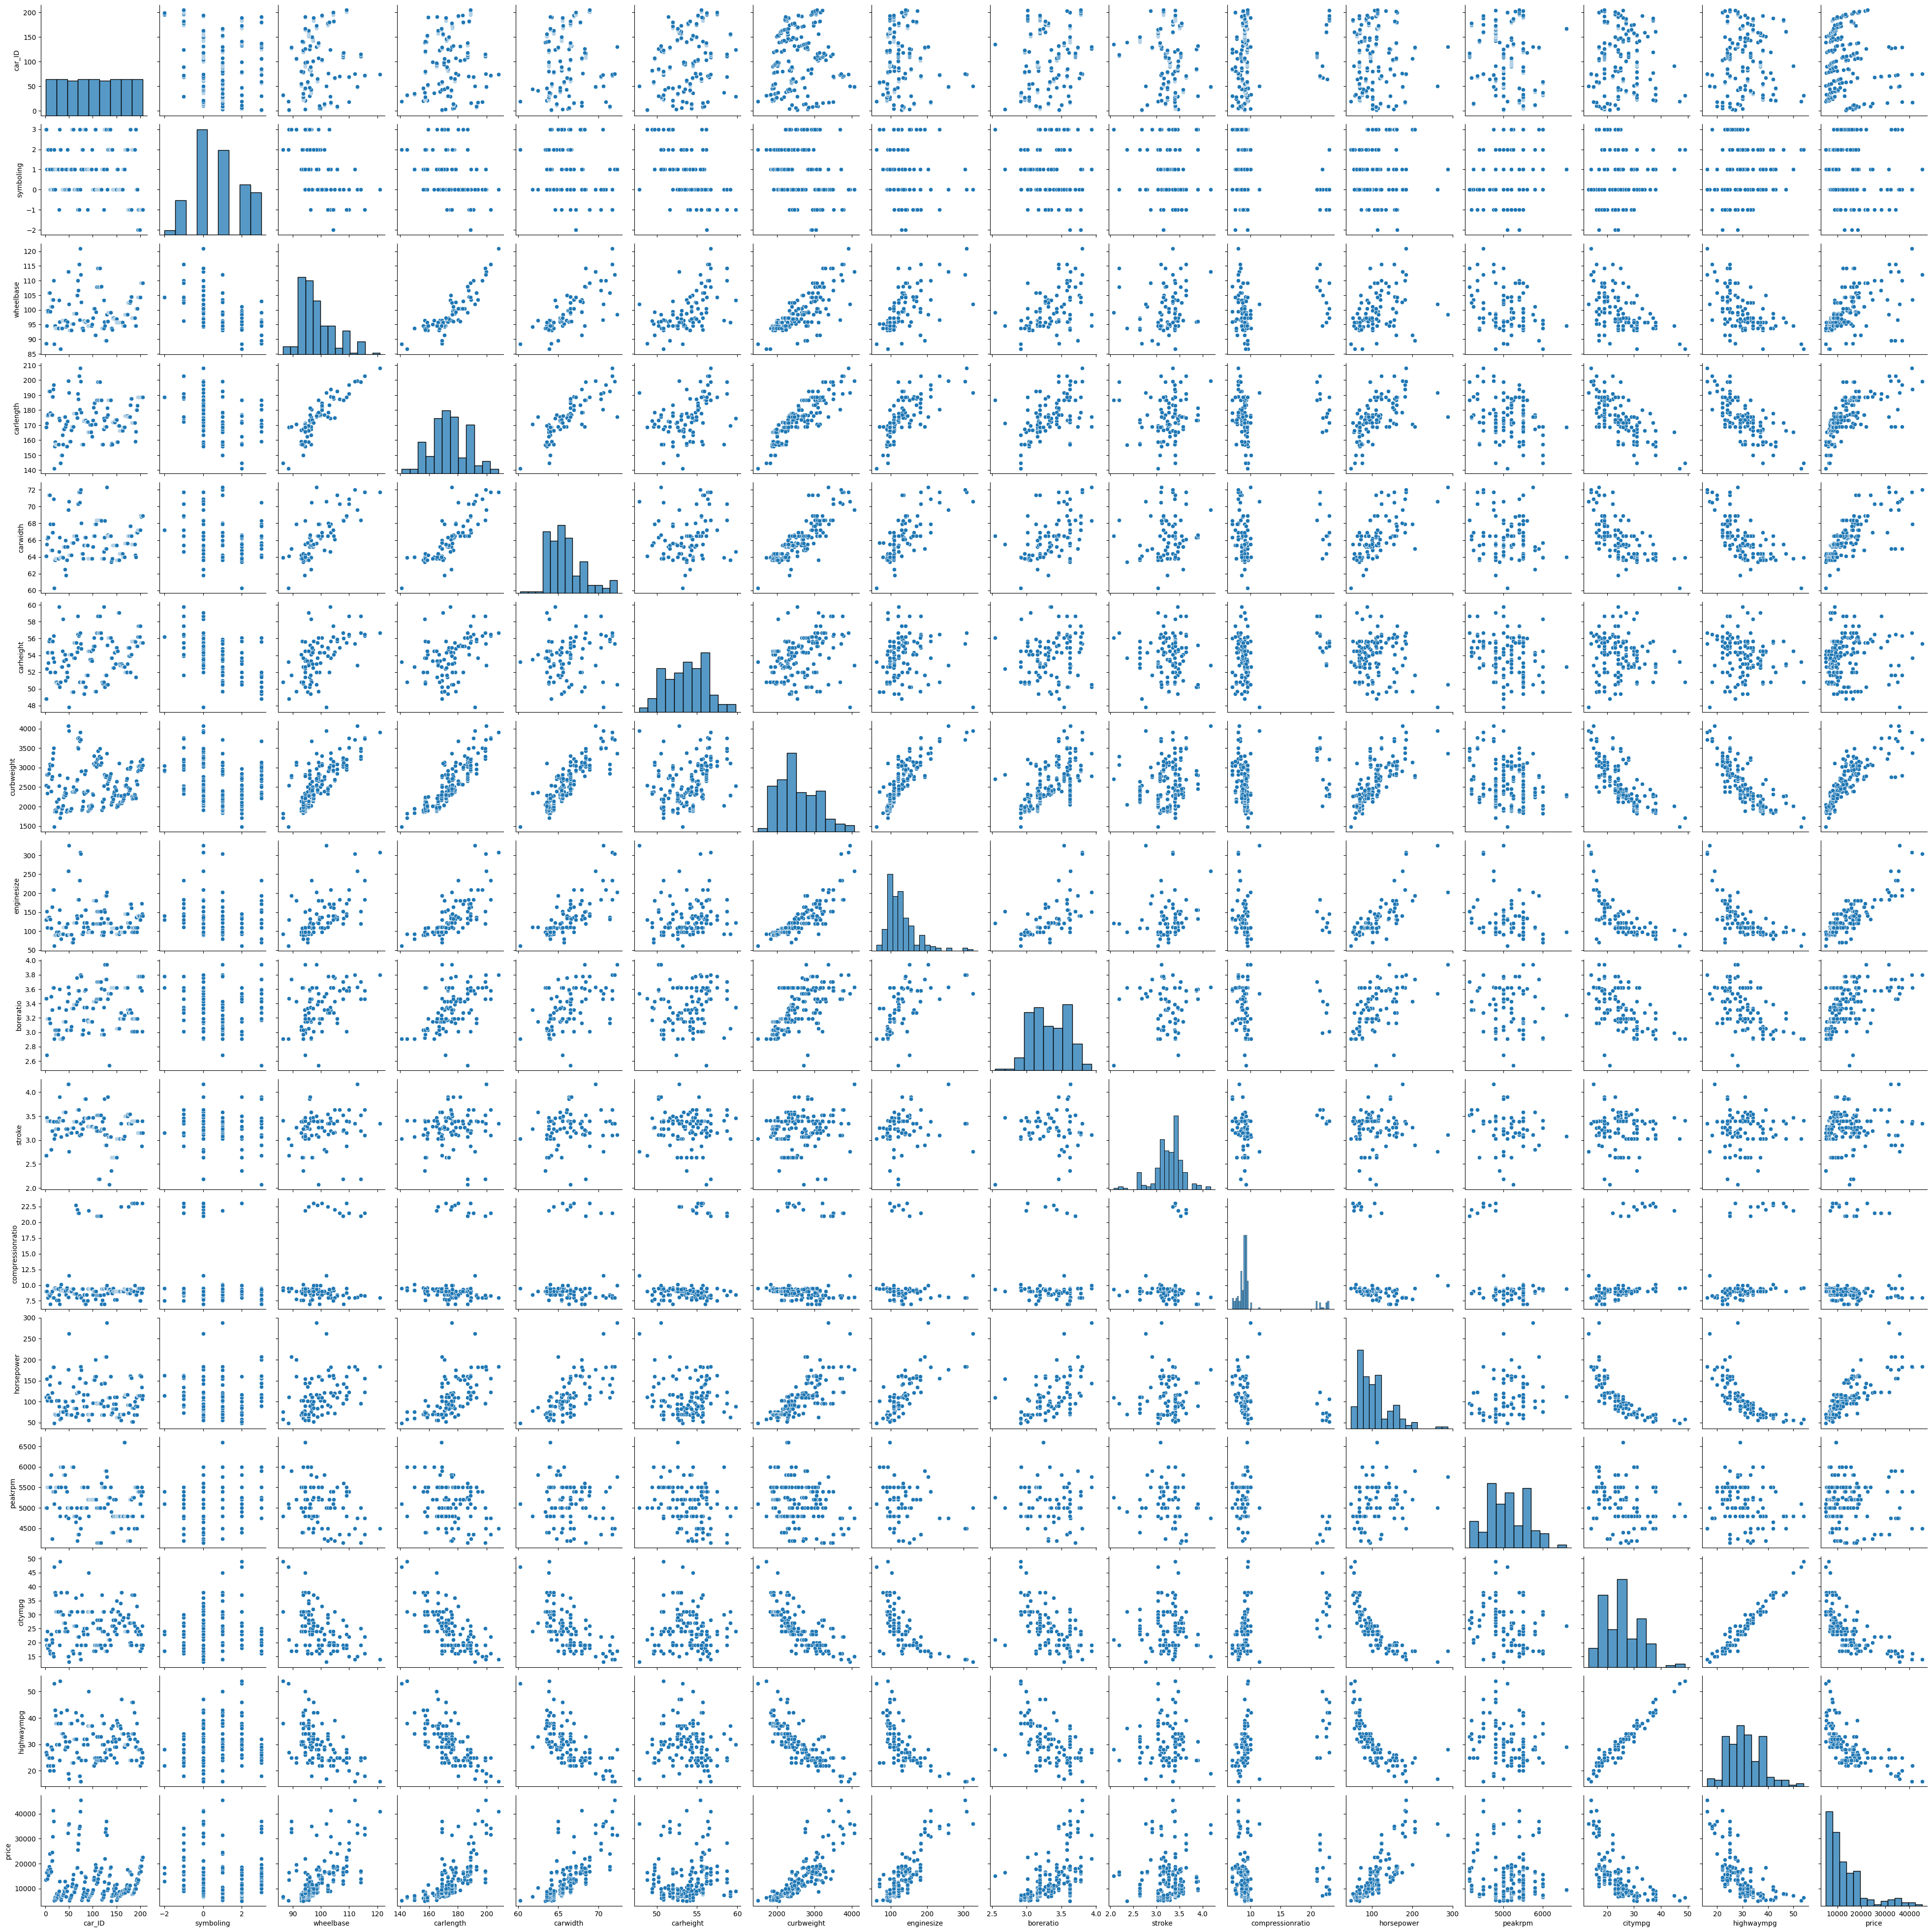

In [9]:
sns.pairplot(df)
plt.show()

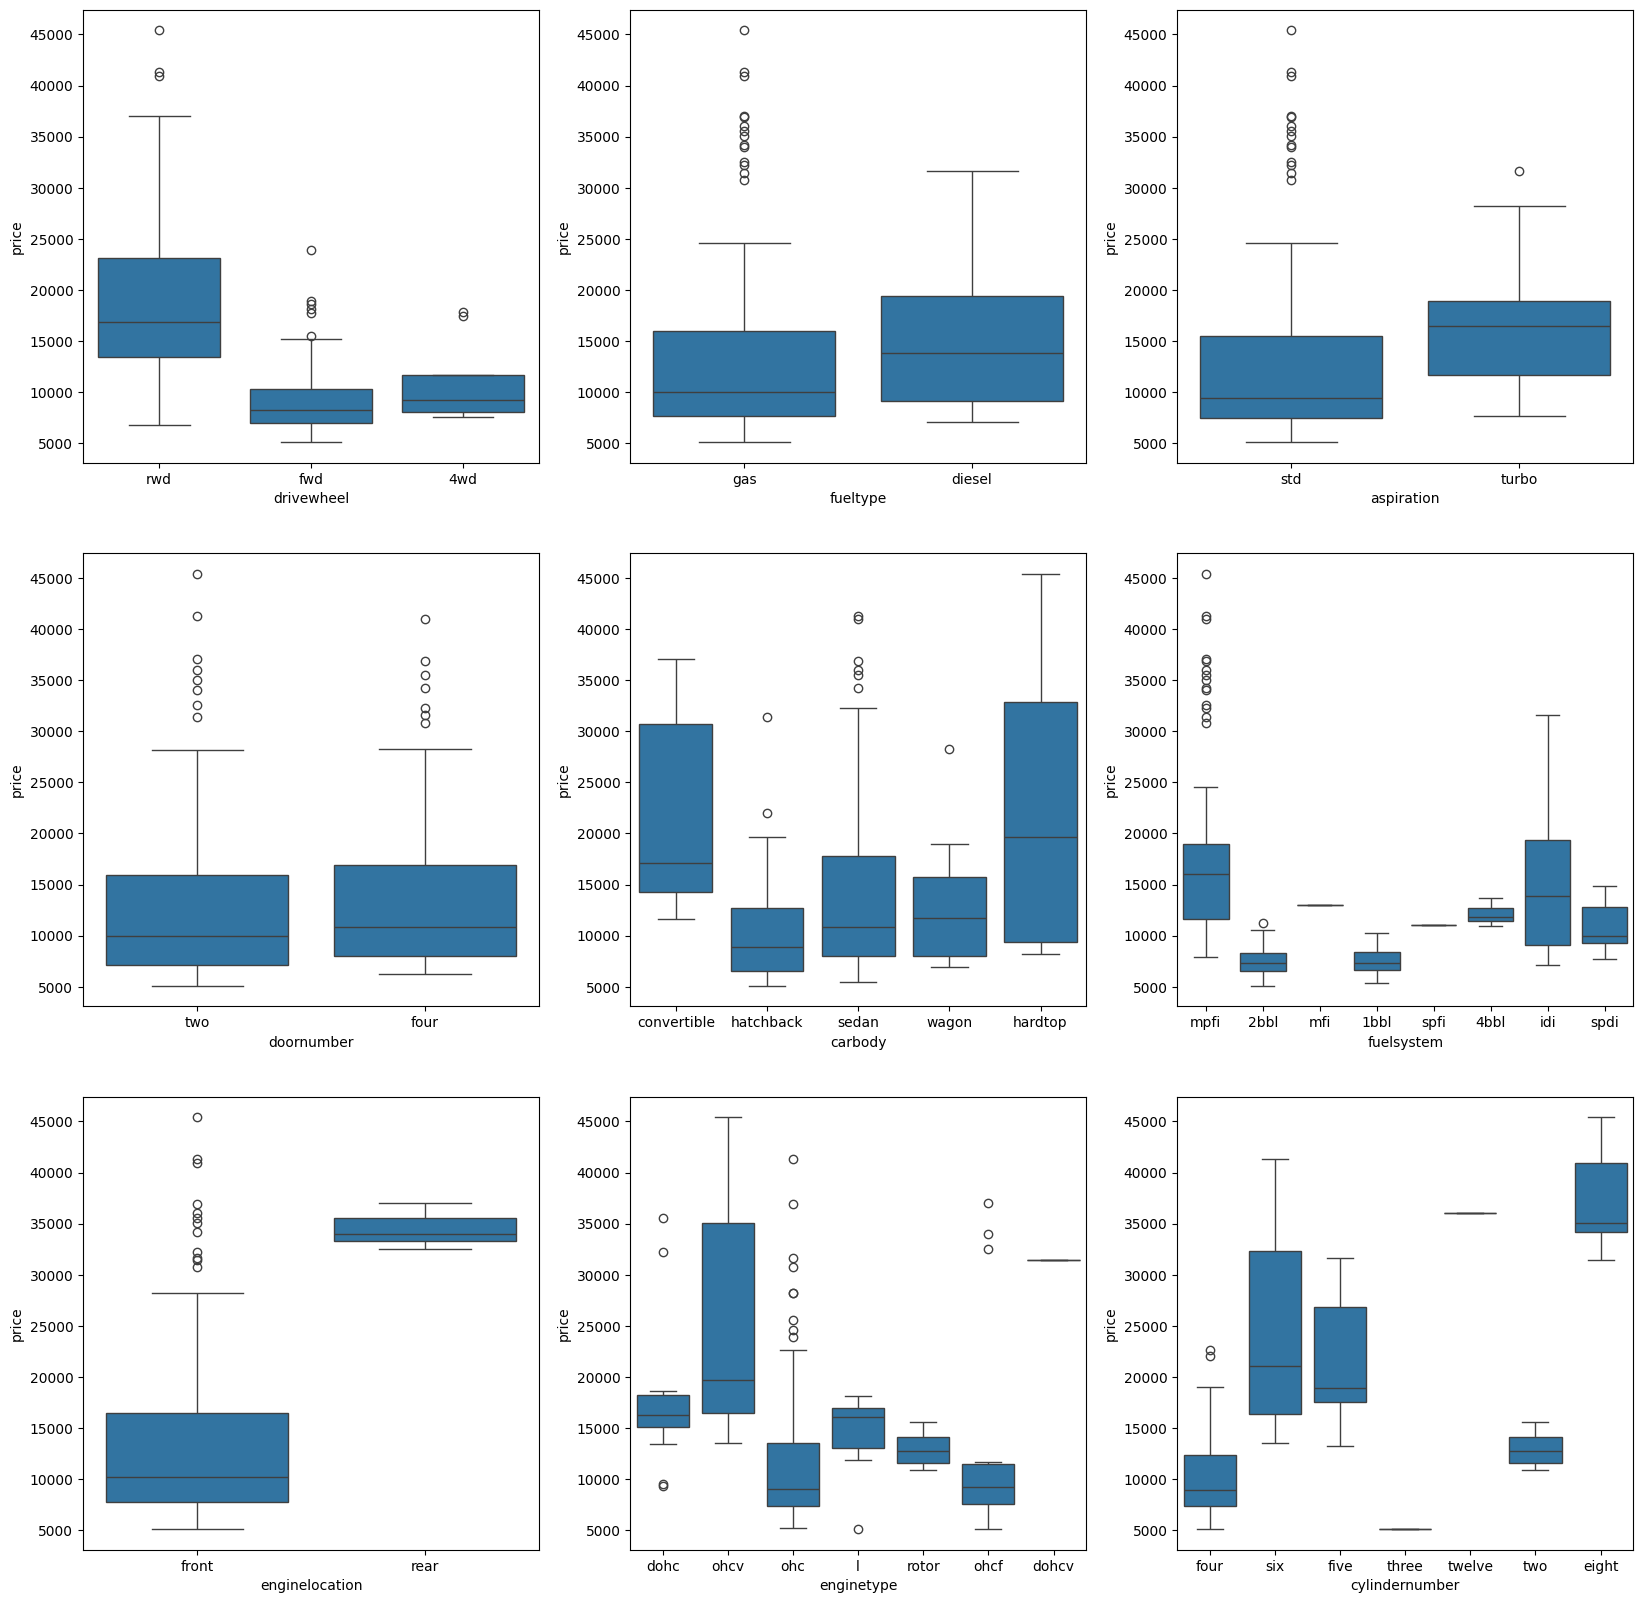

In [10]:
#for categorical variable
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='drivewheel',y='price', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='fueltype',y='price', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='aspiration',y='price', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='doornumber',y='price', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='carbody',y='price', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='fuelsystem',y='price', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='enginelocation',y='price', data=df)
plt.subplot(3,3,8)
sns.boxplot(x='enginetype',y='price', data=df)
plt.subplot(3,3,9)
sns.boxplot(x='cylindernumber',y='price', data=df)
plt.show()

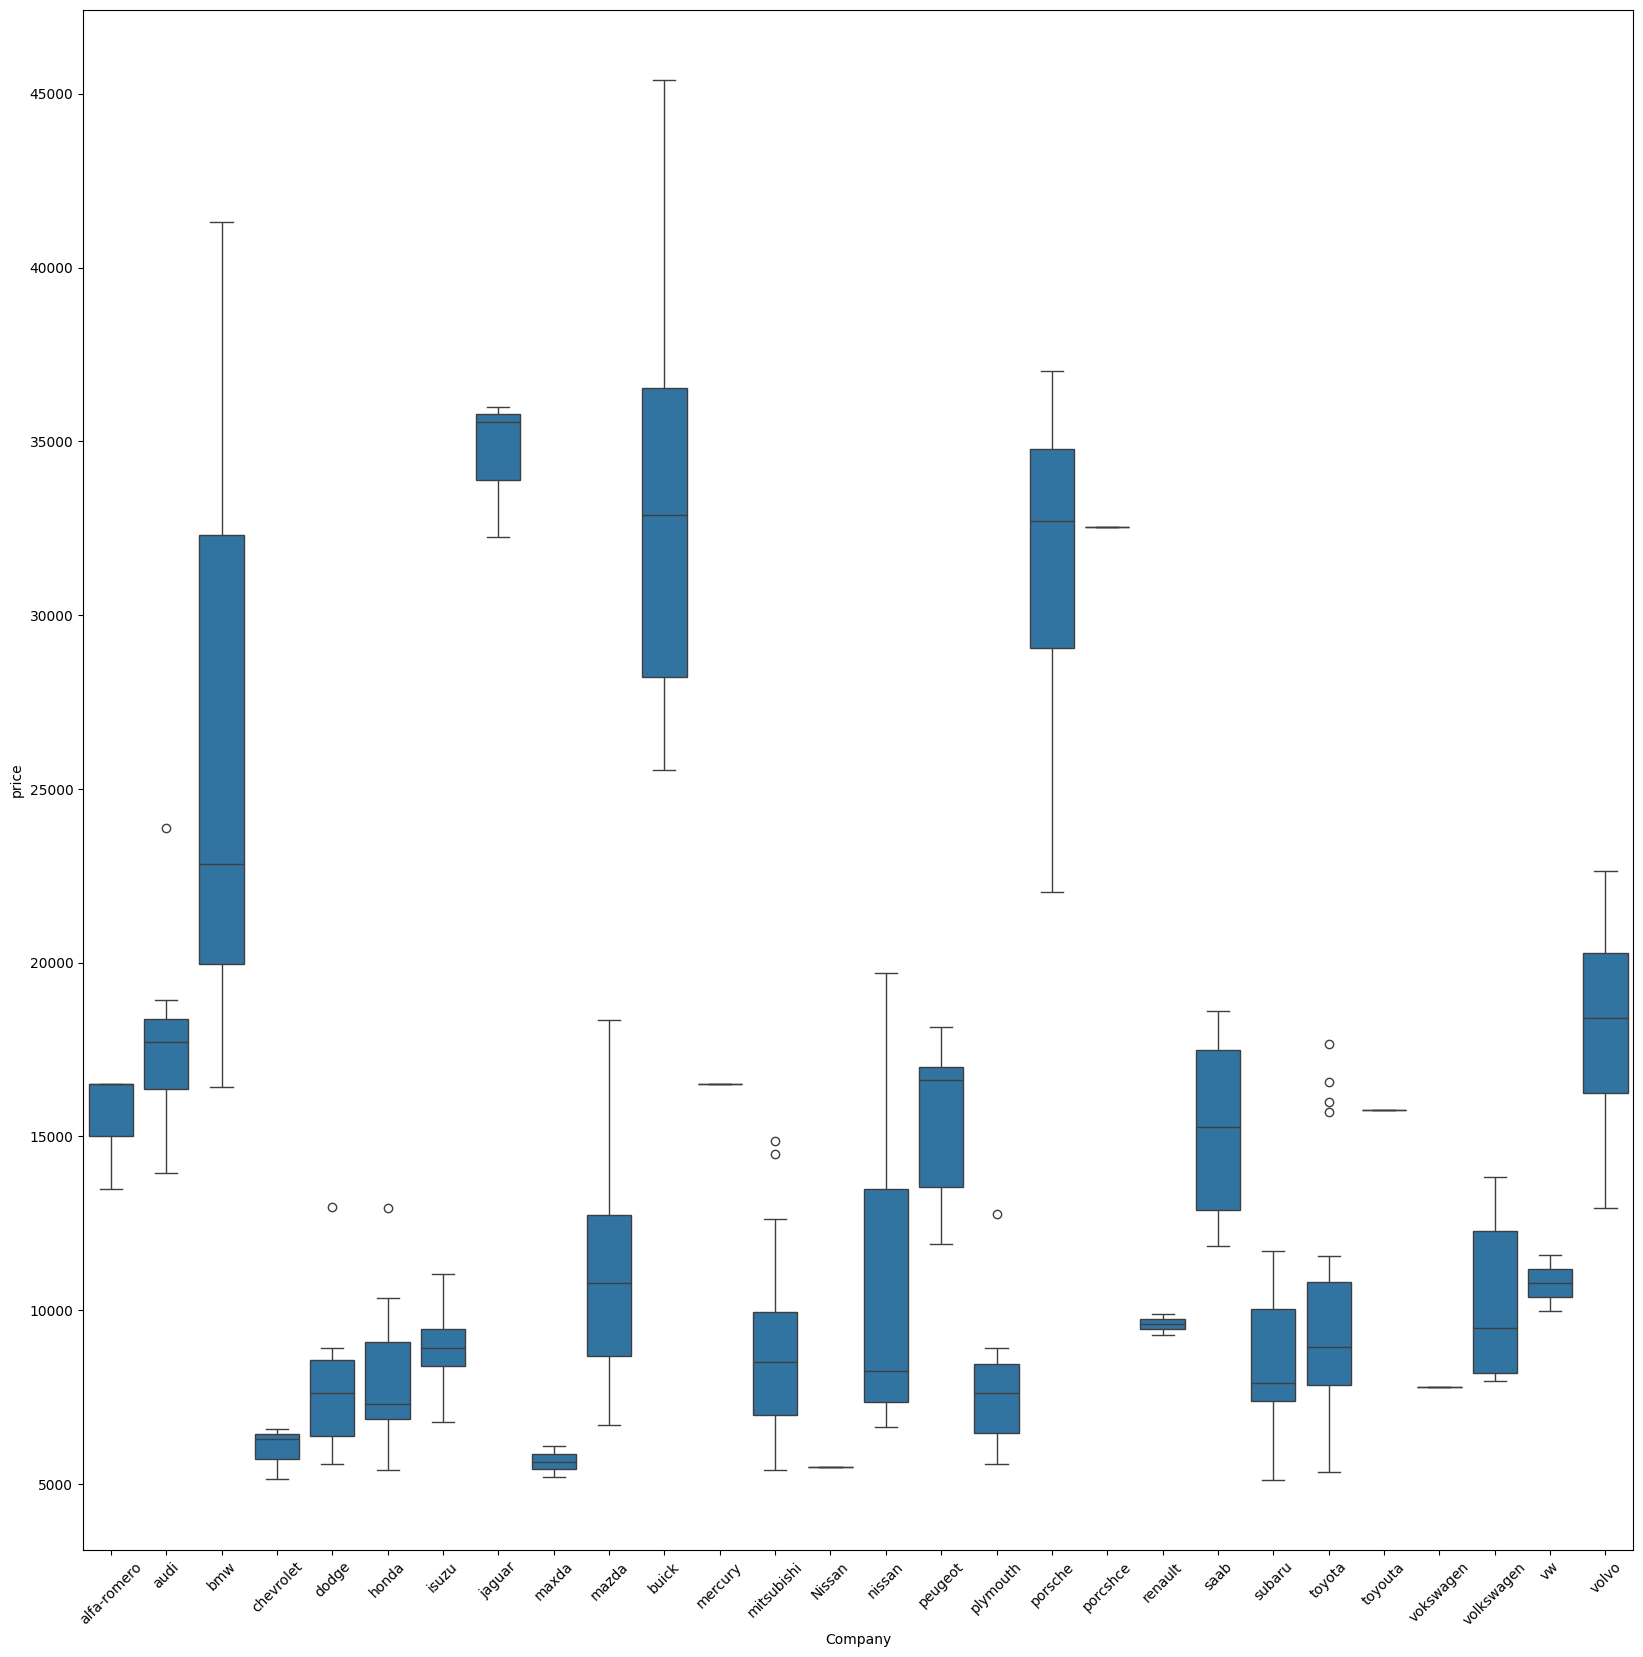

In [11]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Company',y='price', data=df)
plt.xticks(rotation = 45)
plt.show()

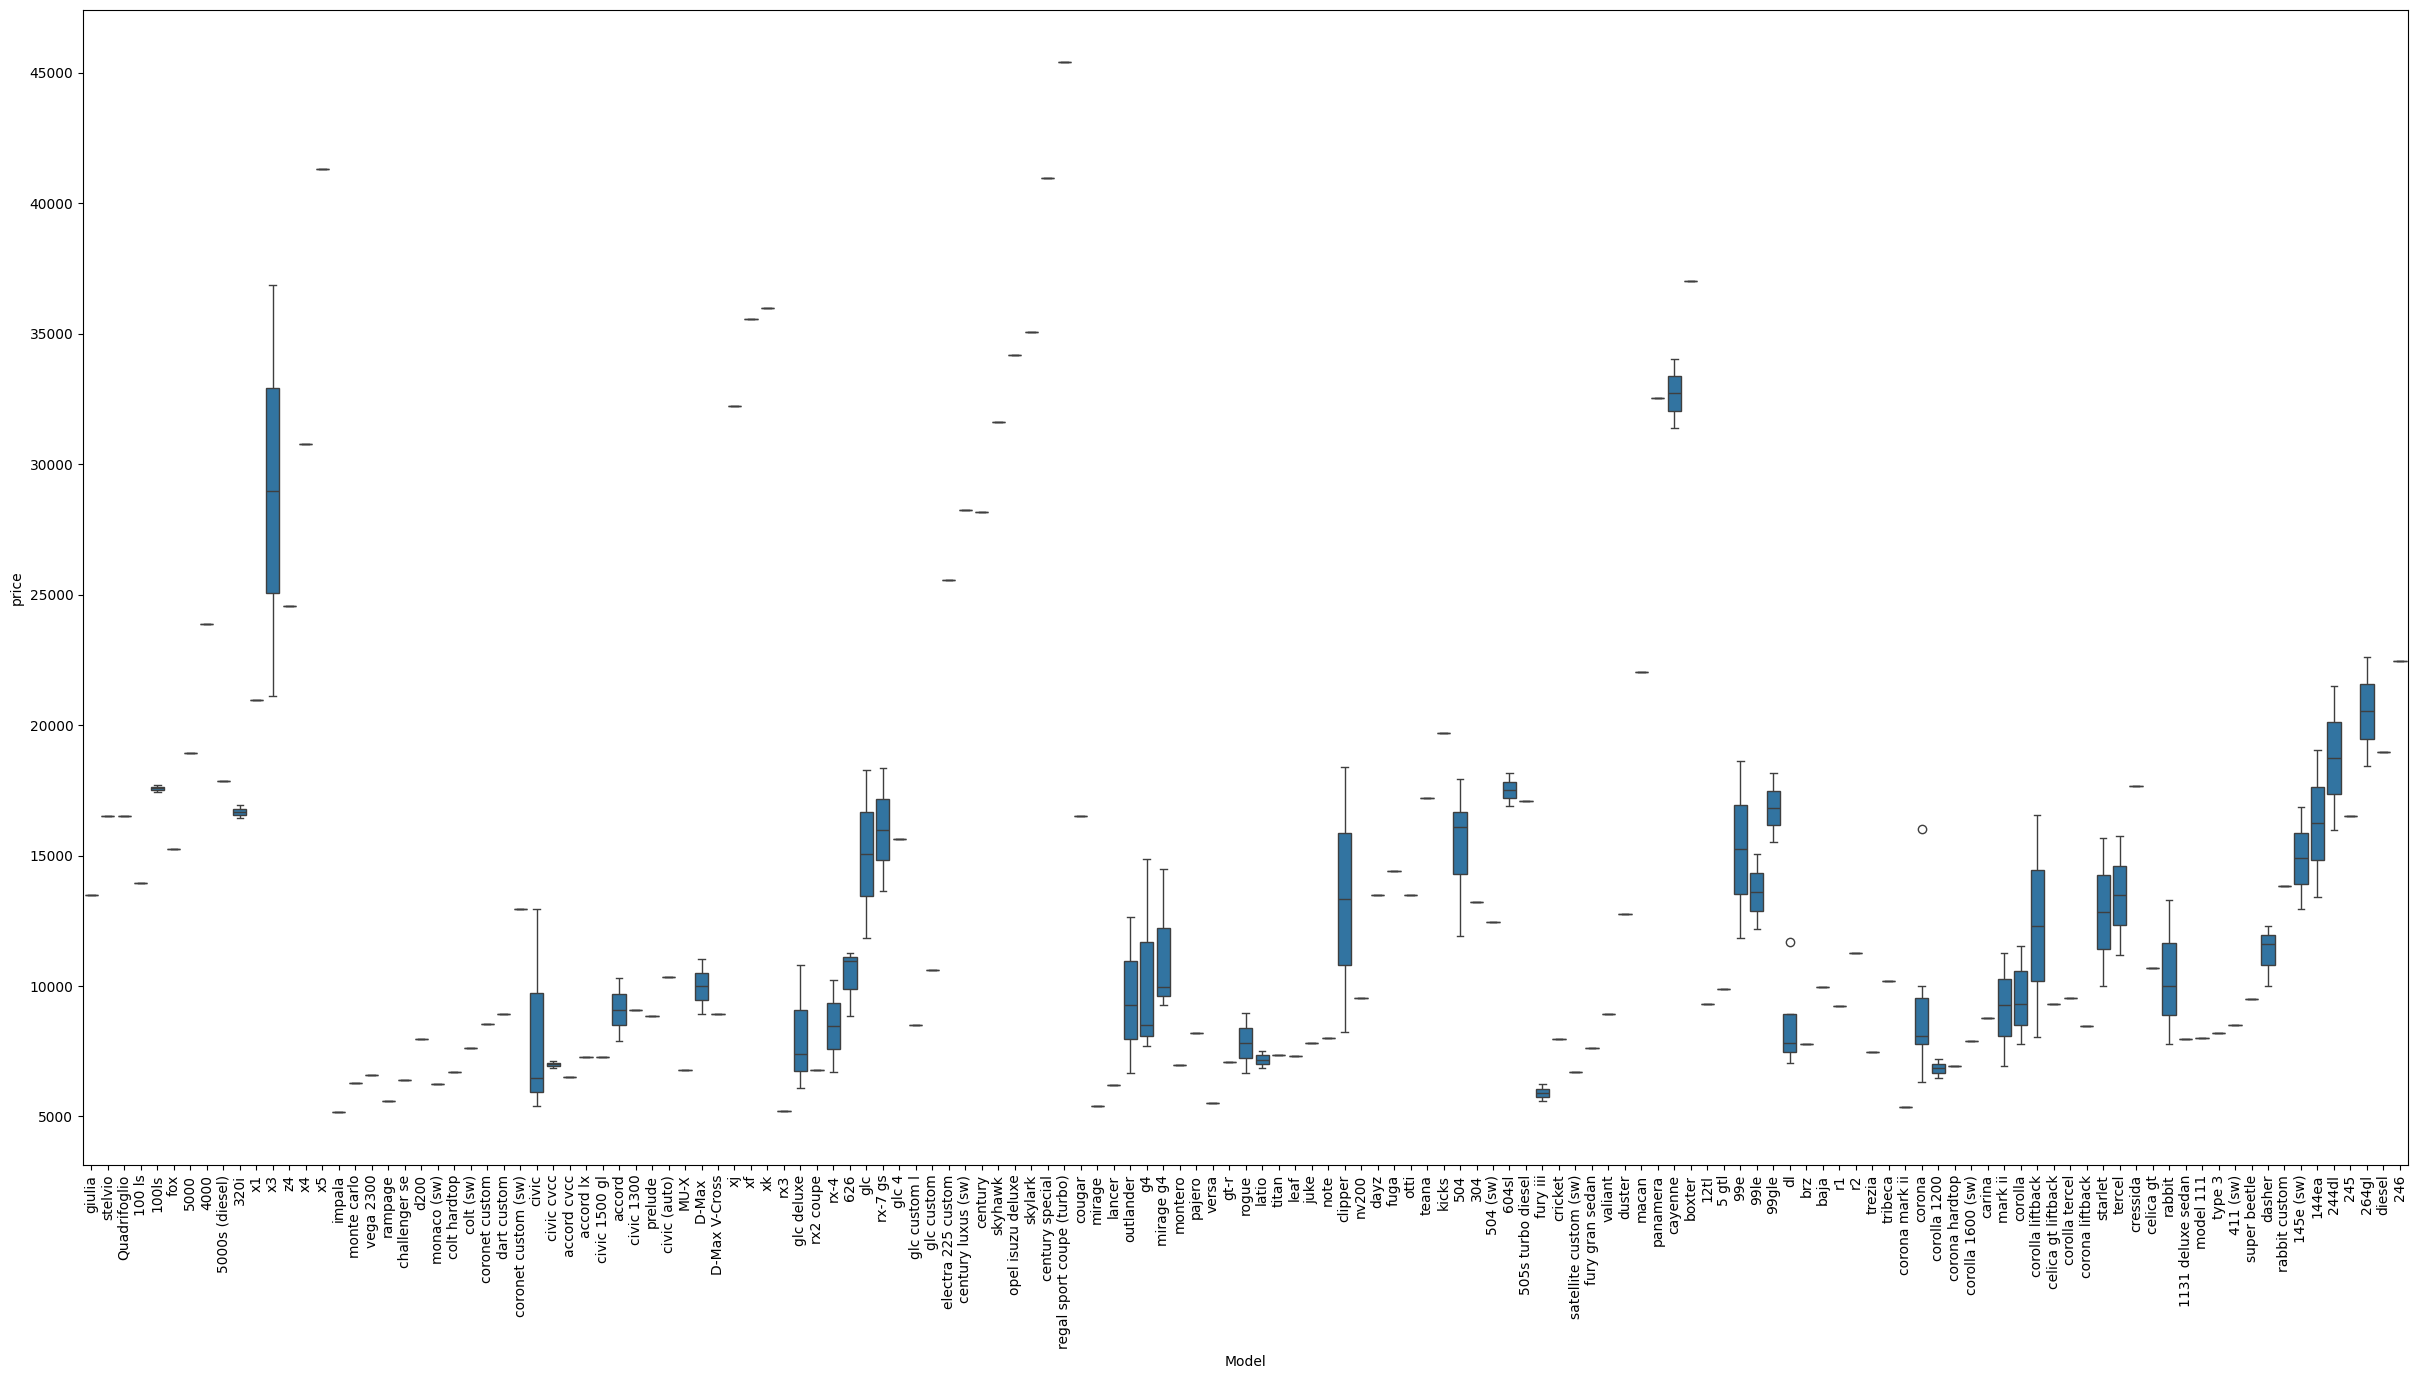

In [12]:
plt.figure(figsize=(30,15))
sns.boxplot(x='Model',y='price', data=df)
plt.xticks(rotation = 90)
plt.show()

## Step2
- Encoding:
    - Converting binary vars to 1 / 0 
    - Other Categorical vars to dummy vars

fueltype: It is a binary variable indicating the type of fuel used by the car. The code converts 'gas' to 1 and 'diesel' to 0.

aspiration: It is a binary variable indicating the type of aspiration system. The code converts 'std' to 1 and 'turbo' to 0.

doornumber: It is a binary variable indicating the number of doors in the car. The code converts 'two' to 1 and 'four' to 0.

enginelocation: It is a binary variable indicating the location of the engine. The code converts 'front' to 1 and 'rear' to 0.

In [13]:
# yes/no vars
varlist =['fueltype']

df[varlist] = df[varlist].apply(lambda x: x.map({'gas':1, 'diesel':0}))
df[varlist].head()

,fueltype
0,1
1,1
2,1
3,1
4,1


In [14]:
# yes/no vars
varlist =['aspiration']

df[varlist] = df[varlist].apply(lambda x: x.map({'std':1, 'turbo':0}))
df[varlist].head()

,aspiration
0,1
1,1
2,1
3,1
4,1


In [15]:
# yes/no vars
varlist =['doornumber']

df[varlist] = df[varlist].apply(lambda x: x.map({'two':1, 'four':0}))
df[varlist].head()

,doornumber
0,1
1,1
2,1
3,0
4,0


In [16]:
# yes/no vars
varlist =['enginelocation']

df[varlist] = df[varlist].apply(lambda x: x.map({'front':1, 'rear':0}))
df[varlist].head()

,enginelocation
0,1
1,1
2,1
3,1
4,1


In [17]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,alfa-romero giulia,1,1,1,convertible,rwd,1,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,1,1,1,convertible,rwd,1,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,1,1,1,hatchback,rwd,1,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,1,1,0,sedan,fwd,1,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,1,1,0,sedan,4wd,1,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


### Dummy Variables

In [18]:
# for drivewheel
wheel = pd.get_dummies(df['drivewheel'],drop_first=True)

wheel = pd.DataFrame(wheel)
wheel = wheel * 1
wheel.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [19]:
## for carbody

body = pd.get_dummies(df['carbody'],drop_first=True)

body = pd.DataFrame(body)
body= body* 1
body.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [20]:
## for cylindernumber

cylinders = pd.get_dummies(df['cylindernumber'],drop_first=True)

cylinders = pd.DataFrame(cylinders)
cylinders = cylinders * 1
cylinders.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [21]:
## for enginetype
etype = pd.get_dummies(df['enginetype'],drop_first=True)

etype = pd.DataFrame(etype)
etype = etype * 1
etype.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [22]:
## for fuelsystem
fsystem = pd.get_dummies(df['fuelsystem'],drop_first=True)

fsystem  = pd.DataFrame(fsystem )
fsystem  = fsystem * 1
fsystem.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [23]:
## for company
company = pd.get_dummies(df['Company'],drop_first=True)

company  = pd.DataFrame(company)
company  = company * 1
company.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,...,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data = df.drop(columns=['car_ID','CarName','drivewheel', 'carbody', 'cylindernumber', 'enginetype', 'fuelsystem','Company','Model'])

# Print the first few rows to verify
data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
Car = pd.concat([data,wheel,body,cylinders,etype,fsystem,company],axis=1)
Car.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


## Splitting into train and test

In [26]:
# Splitting into train and test
df_train, df_test = train_test_split(Car, train_size=0.7, random_state=100)

In [27]:
# Rescaling the Features using Min-Max Scaling
scaler = MinMaxScaler()
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

## Step-3: Training the Model

In [28]:
df_train.corr()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
symboling,1.000000,0.272756,0.102342,0.659214,-0.155104,-0.539877,-0.390880,-0.263917,-0.557179,-0.268481,...,0.188676,0.020266,0.188676,-1.050166e-01,-0.071684,-0.126545,NaN,0.000447,-0.374108,0.220127
fueltype,0.272756,1.000000,0.418546,0.231626,-0.026537,-0.393481,-0.275886,-0.293054,-0.320231,-0.288561,...,0.046291,0.037662,0.046291,9.128709e-02,0.052120,0.026537,NaN,-0.072232,-0.055149,0.037662
aspiration,0.102342,0.418546,1.000000,0.089642,-0.039559,-0.277414,-0.234925,-0.307027,-0.111052,-0.325634,...,0.069007,0.056143,-0.057505,7.554111e-18,0.184527,0.039559,NaN,-0.008973,-0.172642,0.056143
doornumber,0.659214,0.231626,0.089642,1.000000,-0.094565,-0.462232,-0.436645,-0.245854,-0.554436,-0.251023,...,0.164957,0.014260,-0.031617,-1.504513e-01,-0.015381,-0.074470,NaN,-0.092233,-0.185712,0.134209
enginelocation,-0.155104,-0.026537,-0.039559,-0.094565,1.000000,0.127454,0.030193,0.031943,0.067534,-0.033473,...,-0.573270,0.009995,0.012284,2.422508e-02,0.032849,0.007042,NaN,0.015974,0.017562,0.009995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toyouta,-0.126545,0.026537,0.039559,-0.074470,0.007042,0.084426,0.096146,0.025107,0.018971,0.094548,...,-0.012284,-0.009995,-0.012284,-2.422508e-02,-0.032849,1.000000,NaN,-0.015974,-0.017562,-0.009995
vokswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volkswagen,0.000447,-0.072232,-0.008973,-0.092233,0.015974,0.020407,0.060091,0.043146,0.140352,-0.033216,...,-0.027864,-0.022670,-0.027864,-5.494837e-02,-0.074509,-0.015974,NaN,1.000000,-0.039835,-0.022670
volvo,-0.374108,-0.055149,-0.172642,-0.185712,0.017562,0.288038,0.256437,0.209624,0.217012,0.196516,...,-0.030635,-0.024924,-0.030635,-6.041221e-02,-0.081918,-0.017562,NaN,-0.039835,1.000000,-0.024924


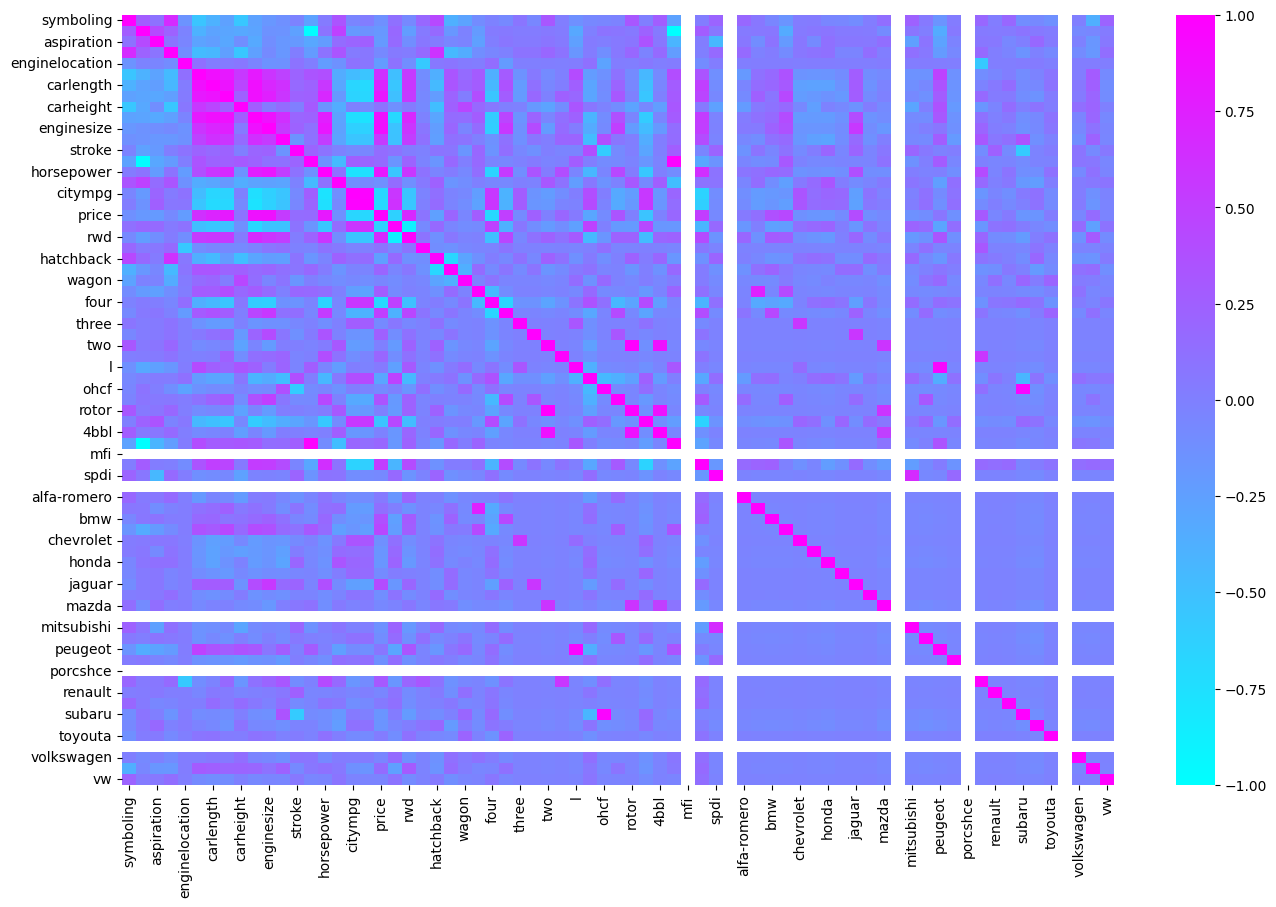

In [29]:
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(),cmap='cool')
plt.show()

In [30]:
# Training the initial model with one feature
X_train_sm = sm.add_constant(df_train['symboling'])
lr = sm.OLS(df_train['price'], X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.419
Date:                Sun, 31 Mar 2024   Prob (F-statistic):              0.122
Time:                        20:50:36   Log-Likelihood:                -1482.9
No. Observations:                 143   AIC:                             2970.
Df Residuals:                     141   BIC:                             2976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.543e+04   1657.297      9.309      0.0

In [31]:
# Training the initial model with one feature
X_train_sm = sm.add_constant(df_train[['symboling','aspiration']])
lr = sm.OLS(df_train['price'], X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     4.043
Date:                Sun, 31 Mar 2024   Prob (F-statistic):             0.0196
Time:                        20:50:36   Log-Likelihood:                -1480.1
No. Observations:                 143   AIC:                             2966.
Df Residuals:                     140   BIC:                             2975.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.829e+04   2030.178      9.007      0.0

In [32]:
# Training the model with all variables
X_train_sm = sm.add_constant(df_train.drop(columns=['price']))
lr = sm.OLS(df_train['price'], X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     51.79
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           3.00e-46
Time:                        20:50:36   Log-Likelihood:                -1220.3
No. Observations:                 143   AIC:                             2565.
Df Residuals:                      81   BIC:                             2748.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3497.1500   4765.141  

### RFE - Recursive Feature Elimination 

In [33]:
# Feature Selection using Recursive Feature Elimination (RFE)
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(df_train.drop(columns=['price']), df_train['price'])
list(zip(df_train.drop(columns=['price']).columns, rfe.support_, rfe.ranking_))

[('symboling', False, 56),
 ('fueltype', False, 17),
 ('aspiration', False, 11),
 ('doornumber', False, 48),
 ('enginelocation', True, 1),
 ('wheelbase', False, 13),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 19),
 ('horsepower', False, 39),
 ('peakrpm', False, 14),
 ('citympg', False, 27),
 ('highwaympg', False, 22),
 ('fwd', False, 59),
 ('rwd', False, 43),
 ('hardtop', False, 23),
 ('hatchback', False, 21),
 ('sedan', False, 24),
 ('wagon', False, 25),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 32),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 3),
 ('dohcv', False, 30),
 ('l', False, 7),
 ('ohc', False, 50),
 ('ohcf', False, 26),
 ('ohcv', False, 57),
 ('rotor', True, 1),
 ('2bbl', False, 28),
 ('4bbl', False, 51),
 ('idi', False, 18),
 ('mfi', False, 52),
 ('mpfi', False, 44),
 ('spdi', False

In [34]:
# Selecting columns based on RFE
selected_cols = df_train.drop(columns=['price']).columns[rfe.support_]
X_train_rfe = df_train[selected_cols]
X_train_rfe = sm.add_constant(X_train_rfe)

In [35]:
# Training the final model with selected features
lm_final = sm.OLS(df_train['price'], X_train_rfe).fit()
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           1.21e-64
Time:                        20:50:36   Log-Likelihood:                -1310.2
No. Observations:                 143   AIC:                             2642.
Df Residuals:                     132   BIC:                             2675.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.128e+04   3049.408      3.

## Step-4 : Residual Analysis

In [36]:
# Predicting the price on the training set
y_train_price = lm_final.predict(X_train_rfe)

In [37]:
# Residual analysis
residuals = df_train['price'] - y_train_price

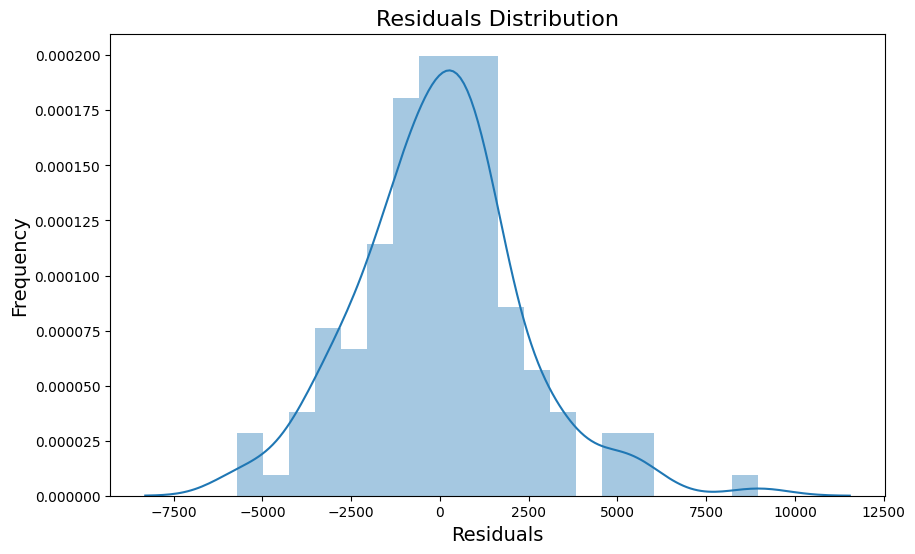

In [38]:
# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.distplot(residuals, bins=20)
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Step5 : Predictions and Evaluation on the Test Set

In [39]:
# Transforming the test set with the same scaler used for training set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [40]:
# Selecting the same columns in the test set as in the training set
X_test_rfe = df_test[selected_cols]
X_test_rfe = sm.add_constant(X_test_rfe)

In [41]:
# Making predictions on the test set
y_pred_test = lm_final.predict(X_test_rfe)

In [42]:
# Calculate R-squared on test set
r2_test = r2_score(df_test['price'], y_pred_test)
print("R-squared on test set:", r2_test)

R-squared on test set: 0.8988141385211725


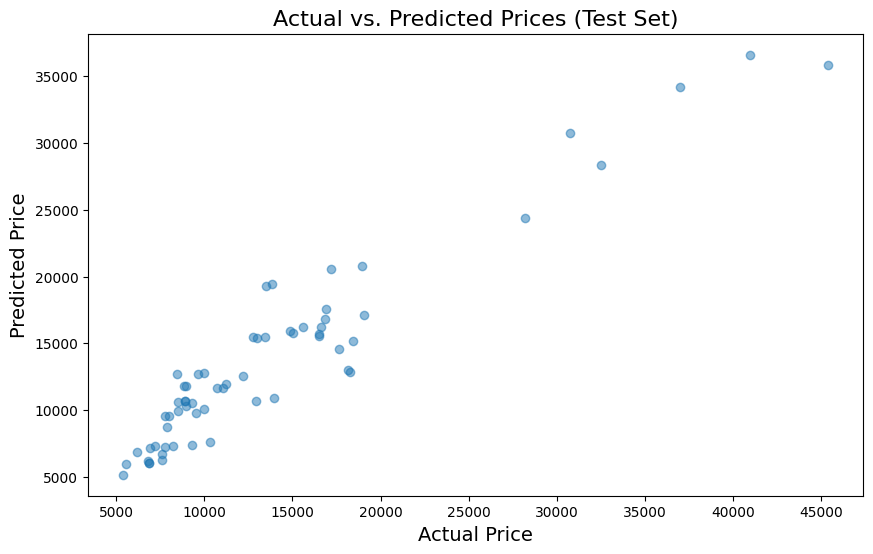

In [43]:
# Visualizing actual vs. predicted prices on the test set
plt.figure(figsize=(10, 6))
plt.scatter(df_test['price'], y_pred_test, alpha=0.5)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Actual vs. Predicted Prices (Test Set)', fontsize=16)
plt.show()

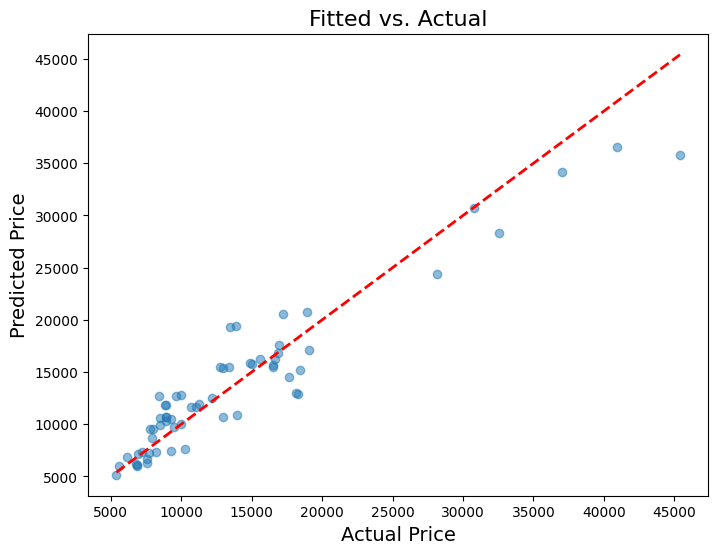

In [44]:
# Fitted vs. Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_test['price'], y_pred_test, alpha=0.5)
plt.plot([df_test['price'].min(), df_test['price'].max()], [df_test['price'].min(), df_test['price'].max()], 'r--', lw=2)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Fitted vs. Actual', fontsize=16)
plt.show()

In [45]:
# Create a DataFrame with actual prices, predicted prices, and variables used for prediction
predictions_df = pd.DataFrame({
    'Actual_Price': df_test['price'],
    'Predicted_Price': y_pred_test
})

In [46]:
# Add the variables used for prediction to the DataFrame
for column in X_test_rfe.columns:
    predictions_df[column] = X_test_rfe[column]

In [47]:
# Save the DataFrame as a CSV file
predictions_df.to_csv('car_price_predictions2.csv', index=False)

In [48]:
predictions_df.head()

,Actual_Price,Predicted_Price,const,enginelocation,carwidth,curbweight,enginesize,boreratio,three,twelve,rotor,bmw,porsche
160,7738.0,7253.860599,1.0,1,0.341667,0.235066,0.139623,0.404762,0,0,0,0,0
186,8495.0,9964.137491,1.0,1,0.433333,0.305275,0.181132,0.404762,0,0,0,0,0
59,8845.0,11809.018811,1.0,1,0.516667,0.347944,0.230189,0.563492,0,0,0,0,0
165,9298.0,7419.073944,1.0,1,0.308333,0.301396,0.139623,0.444444,0,0,0,0,0
140,7603.0,6711.544305,1.0,1,0.291667,0.291699,0.177358,0.746032,0,0,0,0,0


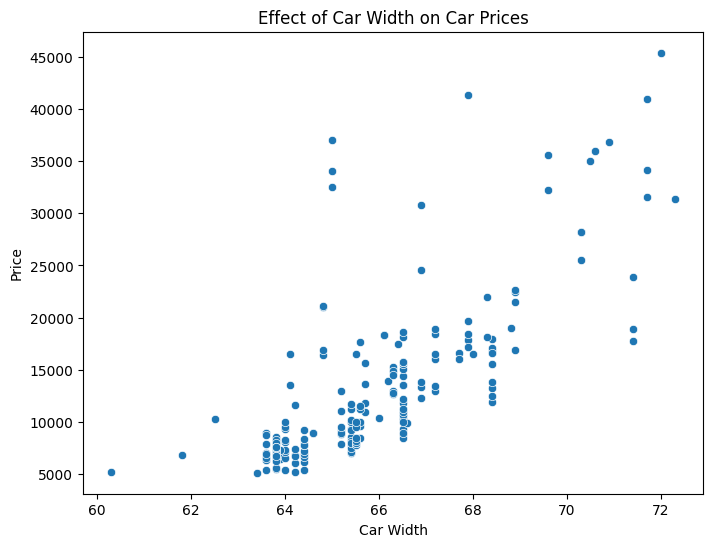

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carwidth', y='price', data=Car)
plt.title('Effect of Car Width on Car Prices')
plt.xlabel('Car Width')
plt.ylabel('Price')
plt.show()

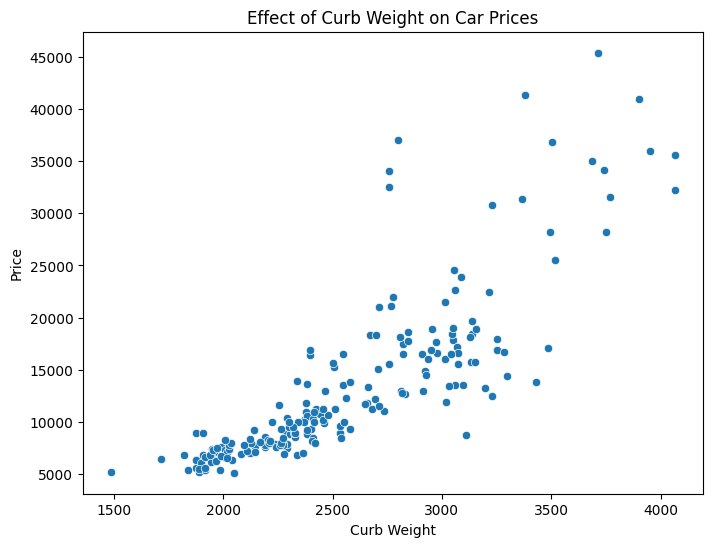

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='curbweight', y='price', data=Car)
plt.title('Effect of Curb Weight on Car Prices')
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.show()

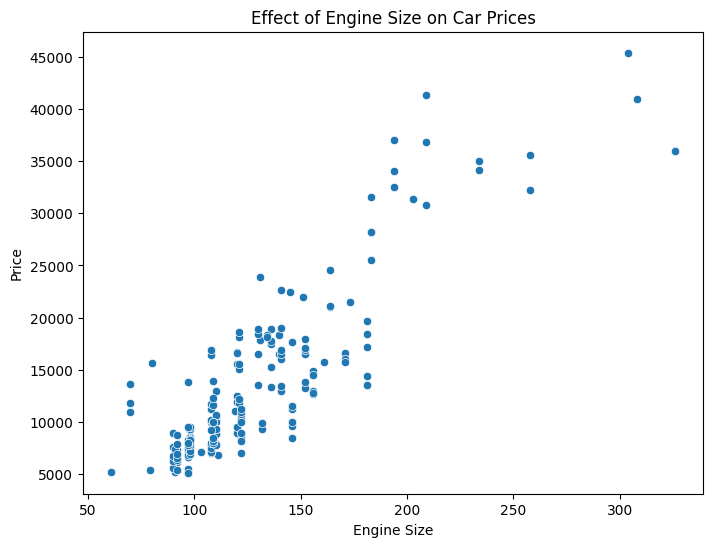

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='enginesize', y='price', data=Car)
plt.title('Effect of Engine Size on Car Prices')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

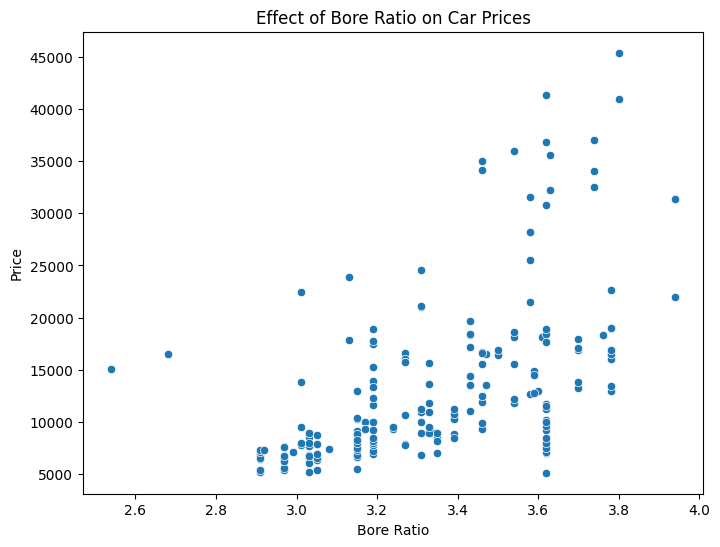

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='boreratio', y='price', data=Car)
plt.title('Effect of Bore Ratio on Car Prices')
plt.xlabel('Bore Ratio')
plt.ylabel('Price')
plt.show()

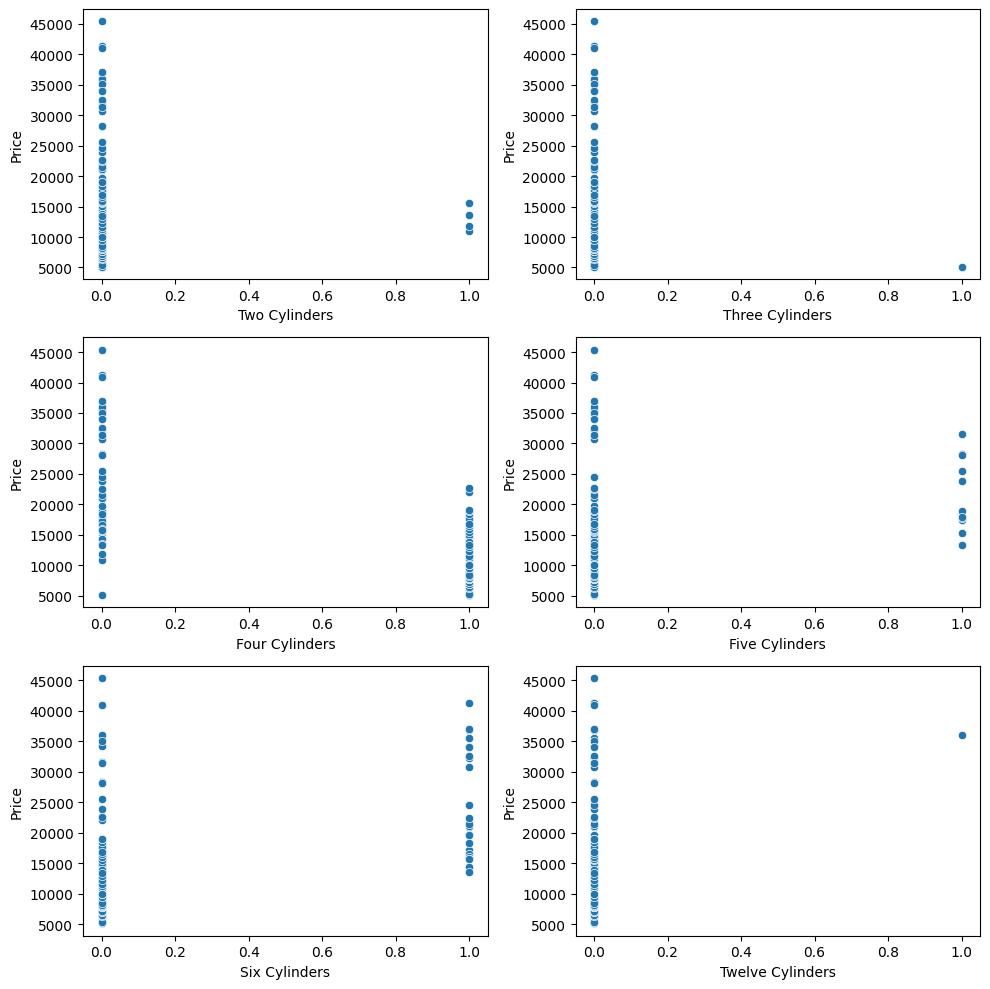

In [53]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
sns.scatterplot(x='two', y='price', data=Car)
plt.xlabel('Two Cylinders')
plt.ylabel('Price')

plt.subplot(3, 2, 2)
sns.scatterplot(x='three', y='price', data=Car)
plt.xlabel('Three Cylinders')
plt.ylabel('Price')

plt.subplot(3, 2, 3)
sns.scatterplot(x='four', y='price', data=Car)
plt.xlabel('Four Cylinders')
plt.ylabel('Price')

plt.subplot(3, 2, 4)
sns.scatterplot(x='five', y='price', data=Car)
plt.xlabel('Five Cylinders')
plt.ylabel('Price')

plt.subplot(3, 2, 5)
sns.scatterplot(x='six', y='price', data=Car)
plt.xlabel('Six Cylinders')
plt.ylabel('Price')

plt.subplot(3, 2, 6)
sns.scatterplot(x='twelve', y='price', data=Car)
plt.xlabel('Twelve Cylinders')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

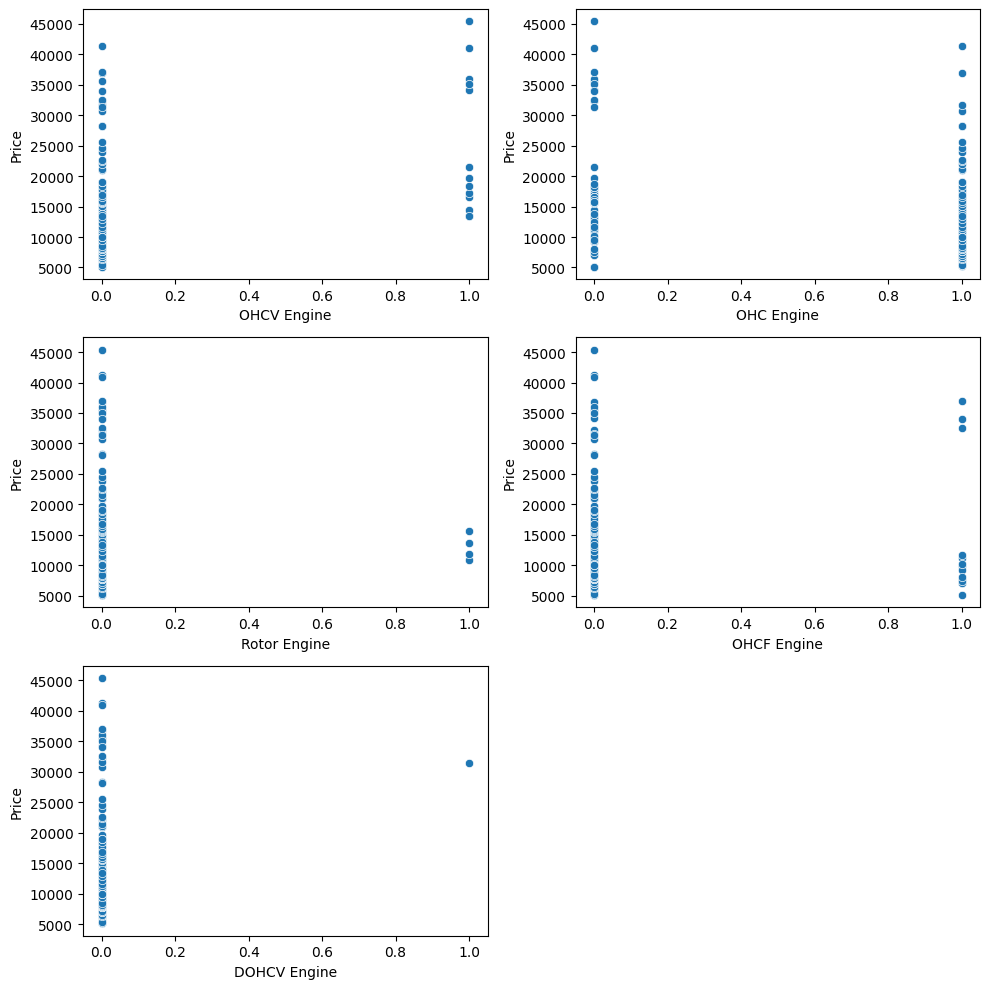

In [54]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
sns.scatterplot(x='ohcv', y='price', data=Car)
plt.xlabel('OHCV Engine')
plt.ylabel('Price')

plt.subplot(3, 2, 2)
sns.scatterplot(x='ohc', y='price', data=Car)
plt.xlabel('OHC Engine')
plt.ylabel('Price')

plt.subplot(3, 2, 3)
sns.scatterplot(x='rotor', y='price', data=Car)
plt.xlabel('Rotor Engine')
plt.ylabel('Price')

plt.subplot(3, 2, 4)
sns.scatterplot(x='ohcf', y='price', data=Car)
plt.xlabel('OHCF Engine')
plt.ylabel('Price')

plt.subplot(3, 2, 5)
sns.scatterplot(x='dohcv', y='price', data=Car)
plt.xlabel('DOHCV Engine')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

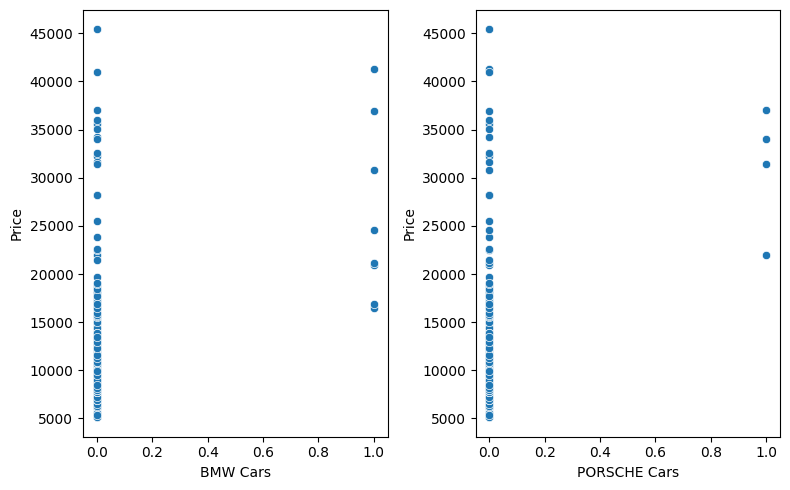

In [55]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='bmw', y='price', data=Car)
plt.xlabel('BMW Cars')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='porsche', y='price', data=Car)
plt.xlabel('PORSCHE Cars')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [56]:
# Calculate the price difference
predictions_df['Price_Difference'] = predictions_df['Actual_Price'] - predictions_df['Predicted_Price']

# Print the first few rows of the DataFrame with the price difference
print(predictions_df[['Actual_Price', 'Predicted_Price', 'Price_Difference']].head())

     Actual_Price  Predicted_Price  Price_Difference
160        7738.0      7253.860599        484.139401
186        8495.0      9964.137491      -1469.137491
59         8845.0     11809.018811      -2964.018811
165        9298.0      7419.073944       1878.926056
140        7603.0      6711.544305        891.455695


In [57]:
# Calculate the absolute percentage difference for each prediction
predictions_df['Abs_Percentage_Difference'] = abs(predictions_df['Price_Difference'] / predictions_df['Actual_Price']) * 100

# Calculate the average percentage difference
avg_percentage_difference = predictions_df['Abs_Percentage_Difference'].mean()

# Print the average percentage difference
print("Average Percentage Difference:", avg_percentage_difference)

Average Percentage Difference: 14.973916829318192


### Which variables are significant in predicting the price of a car?
### How well do those variables describe the price of a car?

Based on the analysis, the significant variables in predicting the price of a car are:

Engine Location: Cars with engines located at the rear tend to have a significant impact on price.

Car Width: Wider cars generally command higher prices.

Curb Weight: Heavier cars typically have higher prices.

Engine Size: Larger engine sizes correlate with higher prices.

Bore Ratio: The bore ratio of the engine also affects the price, although negatively.

Number of Cylinders: Cars with three cylinders and twelve cylinders have significant impacts on price, although twelve cylinders have a negative impact.

Engine Type: Cars with a rotor engine type (presumably rotary engines) have a positive impact on price.

Brand: BMW and Porsche brands are significant predictors of higher car prices.

These variables collectively explain a substantial portion of the variability in car prices, as indicated by the high R-squared value (0.912) on the training set. However, it's essential to note that the model may not capture all factors influencing car prices, and there could be other variables not included in the analysis that also play a role.

In summary, the selected variables provide valuable insights into the factors driving car prices in the American market, with engine-related attributes, car dimensions, and brand being particularly significant.